## Consider 'Walmart Case Study' data set

##problem statement :Help Walmart forecast their sales!

In [126]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
%matplotlib inline
import numpy as np
import pandas as pd
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from scipy.stats import zscore
from sklearn.preprocessing import Imputer
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from __future__ import print_function
from patsy import dmatrices
from statsmodels.formula.api import ols
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
## loading train and test data and preprocessing the data

In [3]:
train= pd.read_csv("train.csv" )
test=pd.read_csv("test.csv")


In [4]:
train.head()

,Year,Month,ProductCategory,Sales
0,2009,1,WomenClothing,1755.0
1,2009,1,MenClothing,524.0
2,2009,1,OtherClothing,936.0
3,2009,2,WomenClothing,1729.0
4,2009,2,MenClothing,496.0


In [5]:
train.ProductCategory.replace(["MenClothing", "OtherClothing", "WomenClothing"],[1, 2, 3], inplace=True)
test.ProductCategory.replace(["MenClothing", "OtherClothing", "WomenClothing"],[1, 2, 3], inplace=True)


In [6]:
train.shape

(216, 4)

In [7]:
test.shape

(36, 4)

In [8]:
test.head()

,Year,Month,ProductCategory,Sales(In ThousandDollars)
0,2015,1,3,NaN
1,2015,1,1,NaN
2,2015,1,2,NaN
3,2015,2,3,NaN
4,2015,2,1,NaN


In [9]:
train.head()

,Year,Month,ProductCategory,Sales
0,2009,1,3,1755.0
1,2009,1,1,524.0
2,2009,1,2,936.0
3,2009,2,3,1729.0
4,2009,2,1,496.0


In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
Year               216 non-null int64
Month              216 non-null int64
ProductCategory    216 non-null int64
Sales              204 non-null float64
dtypes: float64(1), int64(3)
memory usage: 6.8 KB


In [11]:
train.fillna(train.median())# will return the new dataframe, so you will have to write 
train1= train.fillna(train.median()) 

In [12]:
train1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 4 columns):
Year               216 non-null int64
Month              216 non-null int64
ProductCategory    216 non-null int64
Sales              216 non-null float64
dtypes: float64(1), int64(3)
memory usage: 6.8 KB


In [13]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
Year                         36 non-null int64
Month                        36 non-null int64
ProductCategory              36 non-null int64
Sales(In ThousandDollars)    0 non-null float64
dtypes: float64(1), int64(3)
memory usage: 1.2 KB


In [14]:
train_z=train1.iloc[:,0:3]
train_y=train1.iloc[:,3]

In [15]:
test_z=test.iloc[:,0:3]
test_y=test.iloc[:,3]

In [16]:
test_z.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
Year               36 non-null int64
Month              36 non-null int64
ProductCategory    36 non-null int64
dtypes: int64(3)
memory usage: 944.0 bytes


In [17]:
test_z.dtypes

Year               int64
Month              int64
ProductCategory    int64
dtype: object

# Decision tree on train data

In [18]:
DTRegressor_new2 = DecisionTreeRegressor (max_depth=4,  min_samples_split = 2,random_state = 0)
DTRegressor_new2.fit(train_z, train_y)
predicted_labels2 = DTRegressor_new2.predict(test_z)


In [19]:
sub = pd.DataFrame(pd.read_csv("sample_submission.csv")['S.No.'])
sub['Sales'] = predicted_labels2
sub.to_csv("walmart1.csv", index = False)

# loading micro_economic data 


In [20]:
macro1=pd.read_excel("macro_economic.xlsx")

In [21]:
macro1.head()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
0,2009 - Jan,14421.752895,14407.053343,233.402,Democrats,7.8,12.03,11.44,22.05,137,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550
1,2009 - Feb,14389.200466,14366.176571,234.663,Democrats,8.3,12.97,11.05,22.22,200,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100
2,2009 - Mar,14340.701639,14351.786822,235.067,Democrats,8.7,12.97,11.05,22.22,?,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650
3,2009 - Apr,14326.815525,14351.601731,235.582,Democrats,9.0,12.97,11.05,22.13,214,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225
4,2009 - May,14345.904809,14368.123959,235.975,Democrats,9.4,13.32,11.25,22.04,?,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300


In [22]:
macro1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 18 columns):
Year-Month                                                           96 non-null object
Monthly Nominal GDP Index (inMillion$)                               96 non-null float64
Monthly Real GDP Index (inMillion$)                                  96 non-null float64
CPI                                                                  96 non-null float64
PartyInPower                                                         96 non-null object
unemployment rate                                                    96 non-null float64
CommercialBankInterestRateonCreditCardPlans                          96 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    96 non-null float64
Earnings or wages  in dollars per hour                               96 non-null float64
AdvertisingExpenses (in Thousand Dollars)                            96 non-null object
Cotton Mon

# splitting the micro_economic data into train and test
#preprocessing the data

In [23]:
macro_train=macro1.iloc[0:72,:]
macro_test=macro1.iloc[72:84,:]


In [24]:
macro_train.tail()
macro_test.tail()

,Year-Month,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports
79,2015 - Aug,18201.392888,16505.537615,261.347,Democrats,5.1,12.10,9.80,25.04,?,71.82,-0.73,8.750,7.749,784,12.650,3.675,9.475
80,2015 - Sep,18317.816120,16601.489879,261.887,Democrats,5.0,12.10,9.80,25.05,?,68.74,-4.29,8.398,8.012,777,12.977,3.675,9.700
81,2015 - Oct,18278.304270,16540.859723,261.515,Democrats,5.0,12.10,9.80,25.14,183,69.03,0.42,8.398,8.012,772,12.887,3.675,9.700
82,2015 - Nov,18266.244605,16524.199494,261.009,Democrats,5.0,12.22,9.66,25.38,?,69.22,0.28,8.398,7.995,770,12.830,3.675,9.700
83,2015 - Dec,18317.129125,16578.004544,259.941,Democrats,5.0,12.22,9.66,25.21,?,70.39,1.69,8.398,7.995,755,12.580,3.675,9.500


In [25]:
macro_train.rename(columns={'Year-Month':'YearNew'},inplace=True)#renaming column

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [26]:

macro_test.rename(columns={'Year-Month':'YearNew'},inplace=True)#renaming column


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [27]:
macro_train[['YearNew','Month']]=macro_train['YearNew'].str.split("-",expand=True)


C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [28]:
macro_test[['YearNew','Month']]=macro_test['YearNew'].str.split("-",expand=True)

C:\Users\user\Anaconda3\lib\site-packages\pandas\core\frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [29]:
#macro_train.head
macro_test.head

<bound method NDFrame.head of    YearNew  Monthly Nominal GDP Index (inMillion$)  \
72   2015                             17792.116953   
73   2015                             17931.046190   
74   2015                             17900.981857   
75   2015                             18015.748120   
76   2015                             18075.281412   
77   2015                             18188.642468   
78   2015                             18163.857992   
79   2015                             18201.392888   
80   2015                             18317.816120   
81   2015                             18278.304270   
82   2015                             18266.244605   
83   2015                             18317.129125   

    Monthly Real GDP Index (inMillion$)      CPI PartyInPower  \
72                         16319.786314  258.376    Democrats   
73                         16400.926737  259.240    Democrats   
74                         16329.523792  259.647    Democrats   
75     

In [30]:
#macro_train.shape
macro_test.shape

(12, 19)

In [31]:
def getname(name):
    title_group = {' Jan':1,' Feb':2,' Mar':3,' Apr':4,' May':5,' Jun':6,' Jul':7,' Aug':8,' Sep':9,' Oct':10,' Nov':11,' Dec':12}  
    return title_group[name]
macro_train['Month']=macro_train.Month.map(lambda x : getname(x))


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [32]:
def getname(name):
    title_group = {' Jan':1,' Feb':2,' Mar':3,' Apr':4,' May':5,' Jun':6,' Jul':7,' Aug':8,' Sep':9,' Oct':10,' Nov':11,' Dec':12}  
    return title_group[name]
macro_test['Month']=macro_test.Month.map(lambda x : getname(x))


C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [33]:
macro_train.head()
macro_test.head()

,YearNew,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month
72,2015,17792.116953,16319.786314,258.376,Democrats,5.7,11.99,10.47,24.88,?,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
73,2015,17931.046190,16400.926737,259.240,Democrats,5.5,11.98,9.85,25.05,?,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2
74,2015,17900.981857,16329.523792,259.647,Democrats,5.4,11.98,9.85,25.04,?,69.35,-0.70,10.845,9.518,781,15.496,3.625,10.25,3
75,2015,18015.748120,16427.136671,259.959,Democrats,5.4,11.98,9.85,24.94,?,71.70,3.39,10.845,9.518,794,15.735,3.625,10.25,4
76,2015,18075.281412,16434.482376,261.066,Democrats,5.5,12.04,9.69,24.88,?,72.86,1.62,10.845,9.157,826,15.753,3.625,10.30,5


In [34]:
macro = pd.concat([macro_train]*3, ignore_index=True)
micro = pd.concat([macro_test]*3, ignore_index=True)

In [35]:
macro.shape
micro.shape

(36, 19)

In [36]:
macro.head()
micro.head()

,YearNew,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month
0,2015,17792.116953,16319.786314,258.376,Democrats,5.7,11.99,10.47,24.88,?,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
1,2015,17931.046190,16400.926737,259.240,Democrats,5.5,11.98,9.85,25.05,?,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2
2,2015,17900.981857,16329.523792,259.647,Democrats,5.4,11.98,9.85,25.04,?,69.35,-0.70,10.845,9.518,781,15.496,3.625,10.25,3
3,2015,18015.748120,16427.136671,259.959,Democrats,5.4,11.98,9.85,24.94,?,71.70,3.39,10.845,9.518,794,15.735,3.625,10.25,4
4,2015,18075.281412,16434.482376,261.066,Democrats,5.5,12.04,9.69,24.88,?,72.86,1.62,10.845,9.157,826,15.753,3.625,10.30,5


In [37]:
macro_new = macro.sort_values(['YearNew','Month'],ascending=True)
macro_new.head(20)
micro_new = micro.sort_values(['YearNew','Month'],ascending=True)
micro_new.head(5)

,YearNew,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,PartyInPower,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,AdvertisingExpenses (in Thousand Dollars),Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month
0,2015,17792.116953,16319.786314,258.376,Democrats,5.7,11.99,10.47,24.88,?,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
12,2015,17792.116953,16319.786314,258.376,Democrats,5.7,11.99,10.47,24.88,?,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
24,2015,17792.116953,16319.786314,258.376,Democrats,5.7,11.99,10.47,24.88,?,67.35,-1.39,10.845,9.518,760,15.496,3.775,9.45,1
1,2015,17931.046190,16400.926737,259.240,Democrats,5.5,11.98,9.85,25.05,?,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2
13,2015,17931.046190,16400.926737,259.240,Democrats,5.5,11.98,9.85,25.05,?,69.84,3.70,10.845,9.518,781,15.496,3.625,10.20,2


# Combining the train and micro_economic data after the data pre_processing

In [38]:
T_macro=pd.concat((train_z,macro_new),axis=1)
T_micro=pd.concat((test_z,micro_new),axis=1)


In [39]:
#T_macro.shape
T_micro.shape

(36, 22)

In [40]:
test_z.shape

(36, 3)

In [41]:
micro_new.shape

(36, 19)

In [42]:
#T_micro.info()
T_micro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 22 columns):
Year                                                                 36 non-null int64
Month                                                                36 non-null int64
ProductCategory                                                      36 non-null int64
YearNew                                                              36 non-null object
Monthly Nominal GDP Index (inMillion$)                               36 non-null float64
Monthly Real GDP Index (inMillion$)                                  36 non-null float64
CPI                                                                  36 non-null float64
PartyInPower                                                         36 non-null object
unemployment rate                                                    36 non-null float64
CommercialBankInterestRateonCreditCardPlans                          36 non-null float64
Finance Rate on

In [43]:
T_macro= T_macro.drop(T_macro.columns[12],axis=1)
T_macro= T_macro.drop(T_macro.columns[7],axis=1)
#T_macro.head(5)
T_macro=T_macro.replace('?',np.nan)

In [44]:
T_micro= T_micro.drop(T_micro.columns[12],axis=1)
T_micro= T_micro.drop(T_micro.columns[7],axis=1)
#T_micro= T_micro.drop(T_micro.columns[11],axis=1)
#T_macro.head(5)
#T_macro=T_macro.replace('?',np.nan)

In [45]:
#T_macro.isnull().sum()
T_micro.isnull().sum()

Year                                                                 0
Month                                                                0
ProductCategory                                                      0
YearNew                                                              0
Monthly Nominal GDP Index (inMillion$)                               0
Monthly Real GDP Index (inMillion$)                                  0
CPI                                                                  0
unemployment rate                                                    0
CommercialBankInterestRateonCreditCardPlans                          0
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    0
Earnings or wages  in dollars per hour                               0
Cotton Monthly Price - US cents per Pound(lbs)                       0
Change(in%)                                                          0
Average upland planted(million acres)                                0
Averag

In [46]:
T_macro.head(10)

,Year,Month,ProductCategory,YearNew,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",Earnings or wages in dollars per hour,Cotton Monthly Price - US cents per Pound(lbs),Change(in%),Average upland planted(million acres),Average upland harvested(million acres),yieldperharvested acre,Production (in 480-lb netweright in million bales),Mill use (in 480-lb netweright in million bales),Exports,Month
0,2009,1,3,2009,14421.752895,14407.053343,233.402,7.8,12.03,11.44,22.05,57.70,4.02,9.296,7.559,799,12.589,4.17,11.550,1
1,2009,1,1,2009,14389.200466,14366.176571,234.663,8.3,12.97,11.05,22.22,55.21,-4.32,9.296,7.559,799,12.589,3.87,11.100,2
2,2009,1,2,2009,14340.701639,14351.786822,235.067,8.7,12.97,11.05,22.22,51.50,-6.72,9.296,7.559,799,12.589,3.72,11.650,3
3,2009,2,3,2009,14326.815525,14351.601731,235.582,9.0,12.97,11.05,22.13,56.78,10.25,9.296,7.559,787,12.400,3.62,12.225,4
4,2009,2,1,2009,14345.904809,14368.123959,235.975,9.4,13.32,11.25,22.04,61.95,9.11,9.297,7.400,803,12.384,3.52,12.300,5
5,2009,2,2,2009,14348.530666,14346.820106,237.172,9.5,13.32,11.25,21.96,61.39,-0.90,8.668,7.760,796,12.876,3.47,10.300,6
6,2009,3,3,2009,14317.372922,14345.676097,237.600,9.5,13.32,11.25,22.00,64.80,5.55,8.905,7.753,796,12.863,3.47,9.700,7
7,2009,3,1,2009,14424.284901,14435.812509,238.282,9.6,13.71,10.89,22.16,64.26,-0.83,8.905,7.619,809,12.840,3.47,9.700,8
8,2009,3,2,2009,14410.777177,14425.972752,238.568,9.8,13.71,10.89,22.20,64.07,-0.30,8.989,7.582,827,13.071,3.47,10.000,9
9,2009,4,3,2009,14596.605447,14595.393094,238.380,10.0,13.71,10.89,22.27,66.82,4.29,8.989,7.586,799,12.631,3.37,10.000,10


In [47]:
T_micro.shape

(36, 20)

In [48]:
T_macro.shape

(216, 20)

# DT for data(micro_economic ,train)

In [49]:
DTRegressor_new2 = DecisionTreeRegressor (max_depth=4,random_state = 0)
DTRegressor_new2.fit(T_macro, train_y)
predicted_labels2 = DTRegressor_new2.predict(T_micro)
sub = pd.DataFrame(pd.read_csv("sample_submission.csv")['S.No.'])
sub['Sales'] = predicted_labels2
sub.to_csv("walmarttmacro4.csv", index = False)

# loading weather data and pre_processing

In [50]:
data1=pd.read_excel("weather.xlsx",sheet_name=0)
data2=pd.read_excel("weather.xlsx",sheet_name=1)
data3=pd.read_excel("weather.xlsx",sheet_name=2)
data4=pd.read_excel("weather.xlsx",sheet_name=3)
data5=pd.read_excel("weather.xlsx",sheet_name=4)
data6=pd.read_excel("weather.xlsx",sheet_name=5)
data7=pd.read_excel("weather.xlsx",sheet_name=6)
data8=pd.read_excel("weather.xlsx",sheet_name=7)

df1 = pd.concat((data1,data2),axis=0)
df2= pd.concat((df1,data3),axis=0)
df3=pd.concat((df2,data4),axis=0)
df4=pd.concat((df3,data5),axis=0)
wholedata=pd.concat((df4,data6),axis=0)
#data6.head()

In [51]:
wholedata.shape

(2191, 23)

In [52]:
wholedata.head()

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2009,Jan,1,-3,-6,-9,-16,-17,-19,54,...,1023,1015,16,16,16,37,18,60,0,NaN
1,2009,Jan,2,1,-2,-5,-3,-7,-17,78,...,1012,1007,16,13,2,27,10,48,T,Snow
2,2009,Jan,3,3,1,-2,-5,-9,-13,72,...,1015,1008,16,16,16,27,16,42,T,NaN
3,2009,Jan,4,6,1,-4,-10,-12,-13,55,...,1017,1015,16,16,16,32,12,40,0,NaN
4,2009,Jan,5,6,5,3,-1,-5,-16,62,...,1014,1013,16,16,16,23,11,34,T,NaN


In [53]:
wholedata.isnull().sum()

Year                              0
Month                             0
Day                               0
Temp high (°C)                    0
Temp avg (°C)                     0
Temp low (°C)                     0
Dew Point high (°C)               0
Dew Point avg (°C)                0
Dew Point low (°C)                0
Humidity (%) high                 0
Humidity (%) avg                  0
Humidity (%) low                  0
Sea Level Press. (hPa) high       0
Sea Level Press. (hPa) avg        0
Sea Level Press. (hPa) low        0
Visibility (km) high              0
Visibility (km) avg               0
Visibility (km) low               0
Wind (km/h) low                   0
Wind (km/h) avg                   0
Wind (km/h) high                  0
Precip. (mm) sum                  0
WeatherEvent                   1412
dtype: int64

In [54]:
#filling NA with Mean
normal = "Normal Day"
wholedata.WeatherEvent.fillna(normal, inplace=True)

In [55]:
wholedata1=wholedata.dropna()
wholedata1.shape

(2191, 23)

In [56]:
def getname(name):
    title_group = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}  
    return title_group[name]
wholedata1['Month']=wholedata1.Month.map(lambda x : getname(x))

In [57]:
wholedata1.dtypes

Year                            int64
Month                           int64
Day                             int64
Temp high (°C)                 object
Temp avg (°C)                  object
Temp low (°C)                  object
Dew Point high (°C)            object
Dew Point avg (°C)             object
Dew Point low (°C)             object
Humidity (%) high              object
Humidity (%) avg               object
Humidity (%) low               object
Sea Level Press. (hPa) high    object
Sea Level Press. (hPa) avg     object
Sea Level Press. (hPa) low     object
Visibility (km) high           object
Visibility (km) avg            object
Visibility (km) low            object
Wind (km/h) low                object
Wind (km/h) avg                object
Wind (km/h) high               object
Precip. (mm) sum               object
WeatherEvent                   object
dtype: object

In [58]:
wholedata2=wholedata1[wholedata1.iloc[:,4] == "avg"]
wholedata2

,Year,Month,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,2014,1,1,high,avg,low,high,avg,low,high,...,avg,low,high,avg,low,low,avg,high,sum,Normal Day


In [59]:
wholedata1.iloc[:,3]=pd.to_numeric(wholedata1.iloc[:,3], errors='coerce')

In [60]:
wholedata1.iloc[:,4]=pd.to_numeric(wholedata1.iloc[:,4], errors='coerce')

In [61]:
def getname(name):
    title_group = {'Normal Day':1,'Snow':2,'Rain':3,'Fog , Rain , Snow':4,'Fog , Snow':5,'Rain , Snow':6,'Fog':7,'Fog , Rain':8,'Thunderstorm':9}  
    return title_group[name]
wholedata1['WeatherEvent']=wholedata1.WeatherEvent.map(lambda x : getname(x))

In [62]:
for i in list (range (23)):
    wholedata1.iloc[:,i]=pd.to_numeric(wholedata1.iloc[:,i], errors='coerce')

In [63]:
wholedata1.isnull().sum()

Year                             0
Month                            0
Day                              0
Temp high (°C)                   3
Temp avg (°C)                    3
Temp low (°C)                    3
Dew Point high (°C)              3
Dew Point avg (°C)               3
Dew Point low (°C)               3
Humidity (%) high                3
Humidity (%) avg                 3
Humidity (%) low                 3
Sea Level Press. (hPa) high     13
Sea Level Press. (hPa) avg      13
Sea Level Press. (hPa) low      13
Visibility (km) high            11
Visibility (km) avg             11
Visibility (km) low             11
Wind (km/h) low                 14
Wind (km/h) avg                 14
Wind (km/h) high                45
Precip. (mm) sum               154
WeatherEvent                     0
dtype: int64

In [64]:
wholedata1=wholedata1.dropna()

In [65]:
wholedata1.isnull().sum()

Year                           0
Month                          0
Day                            0
Temp high (°C)                 0
Temp avg (°C)                  0
Temp low (°C)                  0
Dew Point high (°C)            0
Dew Point avg (°C)             0
Dew Point low (°C)             0
Humidity (%) high              0
Humidity (%) avg               0
Humidity (%) low               0
Sea Level Press. (hPa) high    0
Sea Level Press. (hPa) avg     0
Sea Level Press. (hPa) low     0
Visibility (km) high           0
Visibility (km) avg            0
Visibility (km) low            0
Wind (km/h) low                0
Wind (km/h) avg                0
Wind (km/h) high               0
Precip. (mm) sum               0
WeatherEvent                   0
dtype: int64

In [66]:
#finding the median wrt month and category
month_median=wholedata1.groupby(['Year','Month']).transform('mean')
month_median.head()

,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.0,57.740741,42.888889,...,1016.37037,1010.666667,16.0,13.888889,11.592593,27.185185,12.0,39.074074,2.803704,1.777778
3,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.0,57.740741,42.888889,...,1016.37037,1010.666667,16.0,13.888889,11.592593,27.185185,12.0,39.074074,2.803704,1.777778
5,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.0,57.740741,42.888889,...,1016.37037,1010.666667,16.0,13.888889,11.592593,27.185185,12.0,39.074074,2.803704,1.777778
6,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.0,57.740741,42.888889,...,1016.37037,1010.666667,16.0,13.888889,11.592593,27.185185,12.0,39.074074,2.803704,1.777778
7,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.0,57.740741,42.888889,...,1016.37037,1010.666667,16.0,13.888889,11.592593,27.185185,12.0,39.074074,2.803704,1.777778


In [67]:
abc=wholedata1.iloc[:,1]
cvf=wholedata1.iloc[:,0]
month_median = month_median.assign(Month=abc.values)
month_median = month_median.assign(Year=cvf.values)
month_median.head()

,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year
0,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.0,57.740741,42.888889,...,16.0,13.888889,11.592593,27.185185,12.0,39.074074,2.803704,1.777778,1,2009
3,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.0,57.740741,42.888889,...,16.0,13.888889,11.592593,27.185185,12.0,39.074074,2.803704,1.777778,1,2009
5,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.0,57.740741,42.888889,...,16.0,13.888889,11.592593,27.185185,12.0,39.074074,2.803704,1.777778,1,2009
6,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.0,57.740741,42.888889,...,16.0,13.888889,11.592593,27.185185,12.0,39.074074,2.803704,1.777778,1,2009
7,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.0,57.740741,42.888889,...,16.0,13.888889,11.592593,27.185185,12.0,39.074074,2.803704,1.777778,1,2009


In [68]:
c2014=month_median.drop_duplicates(subset=None, keep='first', inplace=False)

In [69]:
df=c2014.append(c2014)
df1=df.append(c2014)
df1.shape
df1.head()

,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year
0,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.000000,57.740741,42.888889,...,16.000000,13.888889,11.592593,27.185185,12.000000,39.074074,2.803704,1.777778,1,2009
31,15.230769,6.500000,2.384615,-1.923077,-2.846154,-6.730769,-10.884615,69.461538,54.076923,38.384615,...,16.000000,15.115385,13.153846,27.769231,12.269231,41.461538,0.840385,1.653846,2,2009
59,16.266667,9.566667,5.700000,1.533333,-0.033333,-3.233333,-7.100000,74.166667,57.000000,39.333333,...,16.000000,14.200000,10.566667,26.933333,11.366667,38.666667,1.481667,1.866667,3,2009
90,15.481481,17.333333,12.962963,8.037037,6.333333,2.740741,-0.851852,76.185185,56.148148,35.962963,...,15.888889,13.888889,10.592593,27.370370,11.518519,39.259259,4.411852,1.925926,4,2009
120,14.444444,20.777778,16.518519,12.148148,12.925926,10.148148,6.703704,87.518519,70.370370,52.777778,...,15.888889,12.000000,8.444444,22.148148,7.518519,32.185185,4.862963,2.703704,5,2009


In [70]:
final=df1.sort_values(['Year','Month'], ascending=True)
final.head()


,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year
0,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.000000,57.740741,42.888889,...,16.0,13.888889,11.592593,27.185185,12.000000,39.074074,2.803704,1.777778,1,2009
0,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.000000,57.740741,42.888889,...,16.0,13.888889,11.592593,27.185185,12.000000,39.074074,2.803704,1.777778,1,2009
0,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.000000,57.740741,42.888889,...,16.0,13.888889,11.592593,27.185185,12.000000,39.074074,2.803704,1.777778,1,2009
31,15.230769,6.500000,2.384615,-1.923077,-2.846154,-6.730769,-10.884615,69.461538,54.076923,38.384615,...,16.0,15.115385,13.153846,27.769231,12.269231,41.461538,0.840385,1.653846,2,2009
31,15.230769,6.500000,2.384615,-1.923077,-2.846154,-6.730769,-10.884615,69.461538,54.076923,38.384615,...,16.0,15.115385,13.153846,27.769231,12.269231,41.461538,0.840385,1.653846,2,2009


In [71]:
catog=train.iloc[:,2]
final = final.assign(ProductCategory=catog.values)
final.head()

,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,...,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year,ProductCategory
0,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.000000,57.740741,42.888889,...,13.888889,11.592593,27.185185,12.000000,39.074074,2.803704,1.777778,1,2009,3
0,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.000000,57.740741,42.888889,...,13.888889,11.592593,27.185185,12.000000,39.074074,2.803704,1.777778,1,2009,1
0,16.888889,0.407407,-2.518519,-5.851852,-6.518519,-10.333333,-13.962963,72.000000,57.740741,42.888889,...,13.888889,11.592593,27.185185,12.000000,39.074074,2.803704,1.777778,1,2009,2
31,15.230769,6.500000,2.384615,-1.923077,-2.846154,-6.730769,-10.884615,69.461538,54.076923,38.384615,...,15.115385,13.153846,27.769231,12.269231,41.461538,0.840385,1.653846,2,2009,3
31,15.230769,6.500000,2.384615,-1.923077,-2.846154,-6.730769,-10.884615,69.461538,54.076923,38.384615,...,15.115385,13.153846,27.769231,12.269231,41.461538,0.840385,1.653846,2,2009,1


In [72]:
final_z= final.apply(zscore)
final_z.shape

(216, 24)

In [73]:
final_z.isnull().sum()

Day                            0
Temp high (°C)                 0
Temp avg (°C)                  0
Temp low (°C)                  0
Dew Point high (°C)            0
Dew Point avg (°C)             0
Dew Point low (°C)             0
Humidity (%) high              0
Humidity (%) avg               0
Humidity (%) low               0
Sea Level Press. (hPa) high    0
Sea Level Press. (hPa) avg     0
Sea Level Press. (hPa) low     0
Visibility (km) high           0
Visibility (km) avg            0
Visibility (km) low            0
Wind (km/h) low                0
Wind (km/h) avg                0
Wind (km/h) high               0
Precip. (mm) sum               0
WeatherEvent                   0
Month                          0
Year                           0
ProductCategory                0
dtype: int64

In [74]:

final_z=final_z.drop(final_z.columns[22],axis=1)
final_z=final_z.drop(final_z.columns[13],axis=1)
final_z.head()
final_z.shape


(216, 22)

In [75]:
#final_z=final_z.drop(final_z.columns[0],axis=1)
final_z.shape

(216, 22)

# Test(weather)
#test case for weather data

In [76]:
data7.shape

(365, 23)

In [77]:
data7.isnull().sum()

Year                             0
Month                            0
Day                              0
Temp high (°C)                   0
Temp avg (°C)                    0
Temp low (°C)                    0
Dew Point high (°C)              0
Dew Point avg (°C)               0
Dew Point low (°C)               0
Humidity (%) high                0
Humidity (%) avg                 0
Humidity (%) low                 0
Sea Level Press. (hPa) high      0
Sea Level Press. (hPa) avg       0
Sea Level Press. (hPa) low       0
Visibility (km) high             0
Visibility (km) avg              0
Visibility (km) low              0
Wind (km/h) low                  0
Wind (km/h) avg                  0
Wind (km/h) high                 0
Precip. (mm) sum                 0
WeatherEvent                   250
dtype: int64

In [78]:
#filling NA with Mean
data7.WeatherEvent.fillna('Normal Day', inplace=True)

In [79]:
def getname(name):
    title_group = {'Normal Day':1,'Snow':2,'Rain':3,'Fog , Rain , Snow':4,'Fog , Snow':5,'Rain , Snow':6,'Fog':7,'Fog , Rain':8,'Thunderstorm':9}  
    return title_group[name]
data7['WeatherEvent']=data7.WeatherEvent.map(lambda x : getname(x))

In [80]:
def getname(name):
    title_group = {'Jan':1,'Feb':2,'Mar':3,'Apr':4,'May':5,'Jun':6,'Jul':7,'Aug':8,'Sep':9,'Oct':10,'Nov':11,'Dec':12}  
    return title_group[name]
data7['Month']=data7.Month.map(lambda x : getname(x))

In [81]:
for i in list (range (23)):
    data7.iloc[:,i]=pd.to_numeric(data7.iloc[:,i], errors='coerce')

In [82]:
data7.isnull().sum()

Year                            0
Month                           0
Day                             0
Temp high (°C)                  0
Temp avg (°C)                   0
Temp low (°C)                   0
Dew Point high (°C)             0
Dew Point avg (°C)              0
Dew Point low (°C)              0
Humidity (%) high               0
Humidity (%) avg                0
Humidity (%) low                0
Sea Level Press. (hPa) high     2
Sea Level Press. (hPa) avg      2
Sea Level Press. (hPa) low      2
Visibility (km) high           13
Visibility (km) avg            13
Visibility (km) low            13
Wind (km/h) low                 2
Wind (km/h) avg                 2
Wind (km/h) high                2
Precip. (mm) sum               22
WeatherEvent                    0
dtype: int64

In [83]:
data7.isnull().sum()

Year                            0
Month                           0
Day                             0
Temp high (°C)                  0
Temp avg (°C)                   0
Temp low (°C)                   0
Dew Point high (°C)             0
Dew Point avg (°C)              0
Dew Point low (°C)              0
Humidity (%) high               0
Humidity (%) avg                0
Humidity (%) low                0
Sea Level Press. (hPa) high     2
Sea Level Press. (hPa) avg      2
Sea Level Press. (hPa) low      2
Visibility (km) high           13
Visibility (km) avg            13
Visibility (km) low            13
Wind (km/h) low                 2
Wind (km/h) avg                 2
Wind (km/h) high                2
Precip. (mm) sum               22
WeatherEvent                    0
dtype: int64

In [84]:
#finding the median wrt month and category
month_median_test=data7.groupby(['Year','Month']).transform('mean')
month_median_test.head()

,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,...,Sea Level Press. (hPa) avg,Sea Level Press. (hPa) low,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent
0,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.83871,...,1019.387097,1013.774194,16.0,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.0
1,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.83871,...,1019.387097,1013.774194,16.0,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.0
2,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.83871,...,1019.387097,1013.774194,16.0,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.0
3,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.83871,...,1019.387097,1013.774194,16.0,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.0
4,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.83871,...,1019.387097,1013.774194,16.0,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.0


In [85]:
t_abc=data7.iloc[:,1]
t_cvf=data7.iloc[:,0]
month_median_test = month_median_test.assign(Month=t_abc.values)
month_median_test = month_median_test.assign(Year=t_cvf.values)
month_median_test.head()

,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year
0,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.83871,...,16.0,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.0,1,2015
1,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.83871,...,16.0,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.0,1,2015
2,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.83871,...,16.0,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.0,1,2015
3,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.83871,...,16.0,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.0,1,2015
4,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.83871,...,16.0,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.0,1,2015


In [86]:
c2015=month_median_test.drop_duplicates(subset=None, keep='first', inplace=False)
c2015.shape

(12, 23)

In [87]:
t_df=c2015.append(c2015)
t_df1=t_df.append(c2015)
t_df1.shape

(36, 23)

In [88]:
t_final=t_df1.sort_values(['Year','Month'], ascending=True)
t_final.head()

,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,Year
0,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.838710,...,16.000000,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.000000,1,2015
0,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.838710,...,16.000000,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.000000,1,2015
0,16.0,2.290323,-1.032258,-4.677419,-5.548387,-9.612903,-14.741935,68.967742,53.645161,37.838710,...,16.000000,13.032258,9.354839,27.193548,11.677419,43.516129,4.284839,2.000000,1,2015
31,14.5,0.000000,-4.250000,-9.071429,-8.285714,-12.428571,-17.535714,68.357143,53.892857,39.107143,...,15.857143,13.428571,8.892857,26.892857,11.750000,42.142857,2.072800,1.678571,2,2015
31,14.5,0.000000,-4.250000,-9.071429,-8.285714,-12.428571,-17.535714,68.357143,53.892857,39.107143,...,15.857143,13.428571,8.892857,26.892857,11.750000,42.142857,2.072800,1.678571,2,2015


In [89]:
catog=test.iloc[:,2]
t_final = t_final.assign(ProductCategory=catog.values)

In [90]:
T_final_z= t_final.apply(zscore)
T_final_z.isnull().sum()

C:\Users\user\Anaconda3\lib\site-packages\scipy\stats\stats.py:2253: RuntimeWarning: invalid value encountered in true_divide
  return (a - mns) / sstd


Day                             0
Temp high (°C)                  0
Temp avg (°C)                   0
Temp low (°C)                   0
Dew Point high (°C)             0
Dew Point avg (°C)              0
Dew Point low (°C)              0
Humidity (%) high               0
Humidity (%) avg                0
Humidity (%) low                0
Sea Level Press. (hPa) high     0
Sea Level Press. (hPa) avg      0
Sea Level Press. (hPa) low      0
Visibility (km) high            0
Visibility (km) avg             0
Visibility (km) low             0
Wind (km/h) low                 0
Wind (km/h) avg                 0
Wind (km/h) high                0
Precip. (mm) sum                0
WeatherEvent                    0
Month                           0
Year                           36
ProductCategory                 0
dtype: int64

In [91]:
T_final_z.shape

(36, 24)

In [92]:
T_final_z=T_final_z.drop(T_final_z.columns[22],axis=1)
T_final_z.head()

,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,...,Visibility (km) high,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,ProductCategory
0,0.676716,-1.529224,-1.495101,-1.452187,-1.537403,-1.495087,-1.499872,-1.159992,-0.881352,-0.618224,...,0.662466,-0.998162,-0.536007,1.490811,1.616109,1.615040,1.110741,0.530543,-1.593255,1.224745
0,0.676716,-1.529224,-1.495101,-1.452187,-1.537403,-1.495087,-1.499872,-1.159992,-0.881352,-0.618224,...,0.662466,-0.998162,-0.536007,1.490811,1.616109,1.615040,1.110741,0.530543,-1.593255,-1.224745
0,0.676716,-1.529224,-1.495101,-1.452187,-1.537403,-1.495087,-1.499872,-1.159992,-0.881352,-0.618224,...,0.662466,-0.998162,-0.536007,1.490811,1.616109,1.615040,1.110741,0.530543,-1.593255,0.000000
31,-2.803536,-1.754715,-1.818843,-1.900793,-1.846274,-1.789459,-1.768137,-1.323642,-0.824423,-0.381377,...,-0.331367,-0.582985,-0.771692,1.396570,1.652252,1.328403,-0.867540,-0.438994,-1.303572,1.224745
31,-2.803536,-1.754715,-1.818843,-1.900793,-1.846274,-1.789459,-1.768137,-1.323642,-0.824423,-0.381377,...,-0.331367,-0.582985,-0.771692,1.396570,1.652252,1.328403,-0.867540,-0.438994,-1.303572,-1.224745


In [93]:
T_final_z=T_final_z.drop(T_final_z.columns[13],axis=1)
T_final_z.shape

(36, 22)

In [94]:
#T_final_z=T_final_z.drop(T_final_z.columns[0],axis=1)
T_final_z.shape

(36, 22)

In [95]:
T_final_z.isnull().sum()

Day                            0
Temp high (°C)                 0
Temp avg (°C)                  0
Temp low (°C)                  0
Dew Point high (°C)            0
Dew Point avg (°C)             0
Dew Point low (°C)             0
Humidity (%) high              0
Humidity (%) avg               0
Humidity (%) low               0
Sea Level Press. (hPa) high    0
Sea Level Press. (hPa) avg     0
Sea Level Press. (hPa) low     0
Visibility (km) avg            0
Visibility (km) low            0
Wind (km/h) low                0
Wind (km/h) avg                0
Wind (km/h) high               0
Precip. (mm) sum               0
WeatherEvent                   0
Month                          0
ProductCategory                0
dtype: int64

In [96]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(final_z, train_y, test_size=0.2, random_state=0)

In [97]:
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.tree import DecisionTreeRegressor

DTR= DecisionTreeRegressor ()


In [98]:
# define the parameter values that should be searched
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 40))
print(k_range)
# create a parameter grid: map the parameter names to the values that should be searched
param_grid = dict(max_depth=k_range)
print(param_grid)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]
{'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39]}


In [99]:
# instantiate the grid
#grid = GridSearchCV(DTR, param_grid, cv=10, scoring='accuracy', return_train_score=False)

In [100]:
# fit the grid with data
#grid.fit(final_z, train_y)

In [101]:
T_final_z.head()

,Day,Temp high (°C),Temp avg (°C),Temp low (°C),Dew Point high (°C),Dew Point avg (°C),Dew Point low (°C),Humidity (%) high,Humidity (%) avg,Humidity (%) low,...,Sea Level Press. (hPa) low,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,ProductCategory
0,0.676716,-1.529224,-1.495101,-1.452187,-1.537403,-1.495087,-1.499872,-1.159992,-0.881352,-0.618224,...,-0.175850,-0.998162,-0.536007,1.490811,1.616109,1.615040,1.110741,0.530543,-1.593255,1.224745
0,0.676716,-1.529224,-1.495101,-1.452187,-1.537403,-1.495087,-1.499872,-1.159992,-0.881352,-0.618224,...,-0.175850,-0.998162,-0.536007,1.490811,1.616109,1.615040,1.110741,0.530543,-1.593255,-1.224745
0,0.676716,-1.529224,-1.495101,-1.452187,-1.537403,-1.495087,-1.499872,-1.159992,-0.881352,-0.618224,...,-0.175850,-0.998162,-0.536007,1.490811,1.616109,1.615040,1.110741,0.530543,-1.593255,0.000000
31,-2.803536,-1.754715,-1.818843,-1.900793,-1.846274,-1.789459,-1.768137,-1.323642,-0.824423,-0.381377,...,-0.601489,-0.582985,-0.771692,1.396570,1.652252,1.328403,-0.867540,-0.438994,-1.303572,1.224745
31,-2.803536,-1.754715,-1.818843,-1.900793,-1.846274,-1.789459,-1.768137,-1.323642,-0.824423,-0.381377,...,-0.601489,-0.582985,-0.771692,1.396570,1.652252,1.328403,-0.867540,-0.438994,-1.303572,-1.224745


In [102]:
from sklearn.tree import DecisionTreeRegressor

DTClassifier= DecisionTreeRegressor (max_depth=4, min_samples_split =2)
DTClassifier.fit(final_z,train_y)
predicted_labels = DTClassifier.predict(T_final_z)
predicted_labels 

array([2071.        ,  561.38888889, 1089.53773585, 2841.16666667,
        561.38888889, 1089.53773585, 3430.9125    ,  561.38888889,
       1089.53773585, 3430.9125    ,  704.20833333, 1089.53773585,
       3430.9125    ,  704.20833333, 1089.53773585, 2564.57142857,
        704.20833333,  962.69230769, 3430.9125    ,  704.20833333,
       1089.53773585, 3430.9125    ,  704.20833333, 1089.53773585,
       3430.9125    ,  704.20833333, 1089.53773585, 3430.9125    ,
        704.20833333, 1089.53773585, 3430.9125    ,  704.20833333,
       1089.53773585, 5664.        , 1079.        , 1447.5       ])

In [103]:
sub1 = pd.DataFrame(pd.read_csv("sample_submission.csv")['S.No.'])
sub1['Sales'] = predicted_labels
sub1.to_csv("weather_submission1.csv", index = False)
sub1.head()

,S.No.,Sales
0,1,2071.000000
1,2,561.388889
2,3,1089.537736
3,4,2841.166667
4,5,561.388889


# combing the train,weather and micro_economic data

In [104]:
final_z.shape
#walmart_train.shape

(216, 22)

In [105]:
T_micro.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 0 to 35
Data columns (total 20 columns):
Year                                                                 36 non-null int64
Month                                                                36 non-null int64
ProductCategory                                                      36 non-null int64
YearNew                                                              36 non-null object
Monthly Nominal GDP Index (inMillion$)                               36 non-null float64
Monthly Real GDP Index (inMillion$)                                  36 non-null float64
CPI                                                                  36 non-null float64
unemployment rate                                                    36 non-null float64
CommercialBankInterestRateonCreditCardPlans                          36 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    36 non-null float64
Earnings or wa

In [106]:
aa=T_macro.reset_index()
bb=final_z.reset_index()


In [107]:


aa=aa.drop(labels="index",axis=1)

bb=bb.drop(labels="index",axis=1)

walmart_final_train= pd.concat((aa,bb),axis=1)
walmart_final_train.head()


,Year,Month,ProductCategory,YearNew,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",...,Sea Level Press. (hPa) low,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,ProductCategory
0,2009,1,3,2009,14421.752895,14407.053343,233.402,7.8,12.03,11.44,...,-0.629323,0.095802,0.708054,1.218651,1.298360,0.748661,-0.462804,-0.779086,-1.593255,1.224745
1,2009,1,1,2009,14389.200466,14366.176571,234.663,8.3,12.97,11.05,...,-0.629323,0.095802,0.708054,1.218651,1.298360,0.748661,-0.462804,-0.779086,-1.593255,-1.224745
2,2009,1,2,2009,14340.701639,14351.786822,235.067,8.7,12.97,11.05,...,-0.629323,0.095802,0.708054,1.218651,1.298360,0.748661,-0.462804,-0.779086,-1.593255,0.000000
3,2009,2,3,2009,14326.815525,14351.601731,235.582,9.0,12.97,11.05,...,0.052114,1.389018,1.620685,1.404151,1.427776,1.299872,-1.241289,-1.078928,-1.303572,1.224745
4,2009,2,1,2009,14345.904809,14368.123959,235.975,9.4,13.32,11.25,...,0.052114,1.389018,1.620685,1.404151,1.427776,1.299872,-1.241289,-1.078928,-1.303572,-1.224745


In [114]:
cc=T_micro.reset_index()
dd=T_final_z.reset_index()


cc=cc.drop(labels="index",axis=1)

dd=dd.drop(labels="index",axis=1)

walmart_final_test= pd.concat((cc,dd),axis=1)
walmart_final_test.head()


,Year,Month,ProductCategory,YearNew,Monthly Nominal GDP Index (inMillion$),Monthly Real GDP Index (inMillion$),CPI,unemployment rate,CommercialBankInterestRateonCreditCardPlans,"Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan",...,Sea Level Press. (hPa) low,Visibility (km) avg,Visibility (km) low,Wind (km/h) low,Wind (km/h) avg,Wind (km/h) high,Precip. (mm) sum,WeatherEvent,Month,ProductCategory
0,2015,1,3,2015,17792.116953,16319.786314,258.376,5.7,11.99,10.47,...,-0.175850,-0.998162,-0.536007,1.490811,1.616109,1.615040,1.110741,0.530543,-1.593255,1.224745
1,2015,1,1,2015,17931.046190,16400.926737,259.240,5.5,11.98,9.85,...,-0.175850,-0.998162,-0.536007,1.490811,1.616109,1.615040,1.110741,0.530543,-1.593255,-1.224745
2,2015,1,2,2015,17900.981857,16329.523792,259.647,5.4,11.98,9.85,...,-0.175850,-0.998162,-0.536007,1.490811,1.616109,1.615040,1.110741,0.530543,-1.593255,0.000000
3,2015,2,3,2015,18015.748120,16427.136671,259.959,5.4,11.98,9.85,...,-0.601489,-0.582985,-0.771692,1.396570,1.652252,1.328403,-0.867540,-0.438994,-1.303572,1.224745
4,2015,2,1,2015,18075.281412,16434.482376,261.066,5.5,12.04,9.69,...,-0.601489,-0.582985,-0.771692,1.396570,1.652252,1.328403,-0.867540,-0.438994,-1.303572,-1.224745


In [115]:
walmart_final_train.shape

(216, 42)

In [116]:
walmart_final_test.shape

(36, 42)

In [117]:
from sklearn.tree import DecisionTreeRegressor

DTClassifier= DecisionTreeRegressor (max_depth=4, min_samples_split =2)
DTClassifier.fit(walmart_final_train,train_y)
predicted_labels = DTClassifier.predict(walmart_final_test)
predicted_labels 

array([3071.33333333,  561.38888889, 1173.37878788, 3071.33333333,
        561.38888889, 1173.37878788, 3953.33333333,  561.38888889,
       1173.37878788, 3953.33333333,  704.20833333, 1173.37878788,
       3953.33333333,  704.20833333, 1173.37878788, 3953.33333333,
        704.20833333, 1173.37878788, 3953.33333333,  704.20833333,
       1173.37878788, 3953.33333333,  704.20833333, 1173.37878788,
       3953.33333333,  704.20833333, 1173.37878788, 3953.33333333,
        704.20833333, 1173.37878788, 3953.33333333,  704.20833333,
       1173.37878788, 5264.5       , 1079.        , 1967.        ])

In [118]:
sub1 = pd.DataFrame(pd.read_csv("sample_submission.csv")['S.No.'])
sub1['Sales'] = predicted_labels
sub1.to_csv("final_walmart.csv", index = False)
sub1.head()

,S.No.,Sales
0,1,3071.333333
1,2,561.388889
2,3,1173.378788
3,4,3071.333333
4,5,561.388889


In [119]:
walmart_final_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 42 columns):
Year                                                                 216 non-null int64
Month                                                                216 non-null int64
ProductCategory                                                      216 non-null int64
YearNew                                                              216 non-null object
Monthly Nominal GDP Index (inMillion$)                               216 non-null float64
Monthly Real GDP Index (inMillion$)                                  216 non-null float64
CPI                                                                  216 non-null float64
unemployment rate                                                    216 non-null float64
CommercialBankInterestRateonCreditCardPlans                          216 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    216 non-null float64
Ea

In [120]:
walmart_final_train.shape

(216, 42)

In [145]:
col=train['Sales']
train_new=walmart_final_train.assign(Sales=col.values)
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 43 columns):
Year                                                                 216 non-null int64
Month                                                                216 non-null int64
ProductCategory                                                      216 non-null int64
YearNew                                                              216 non-null object
Monthly Nominal GDP Index (inMillion$)                               216 non-null float64
Monthly Real GDP Index (inMillion$)                                  216 non-null float64
CPI                                                                  216 non-null float64
unemployment rate                                                    216 non-null float64
CommercialBankInterestRateonCreditCardPlans                          216 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    216 non-null float64
Ea

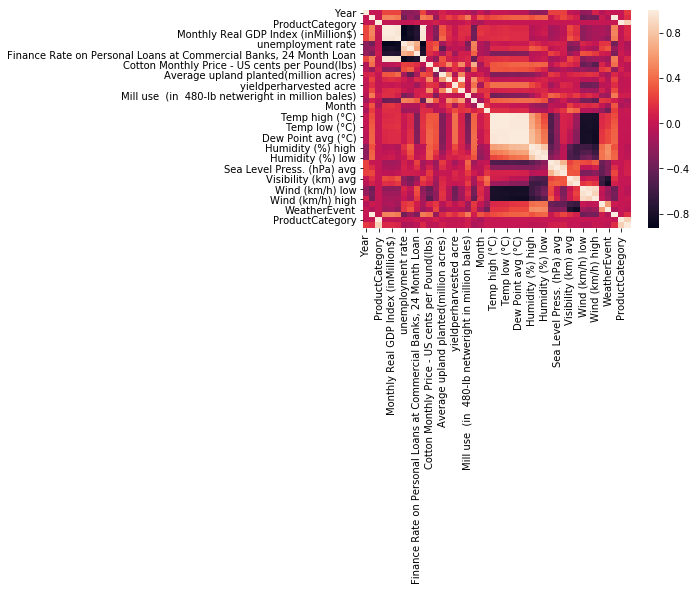

In [146]:
#walmart_final_train.corr()
corr = train_new.corr()
#print(corr)
sns.heatmap(corr)

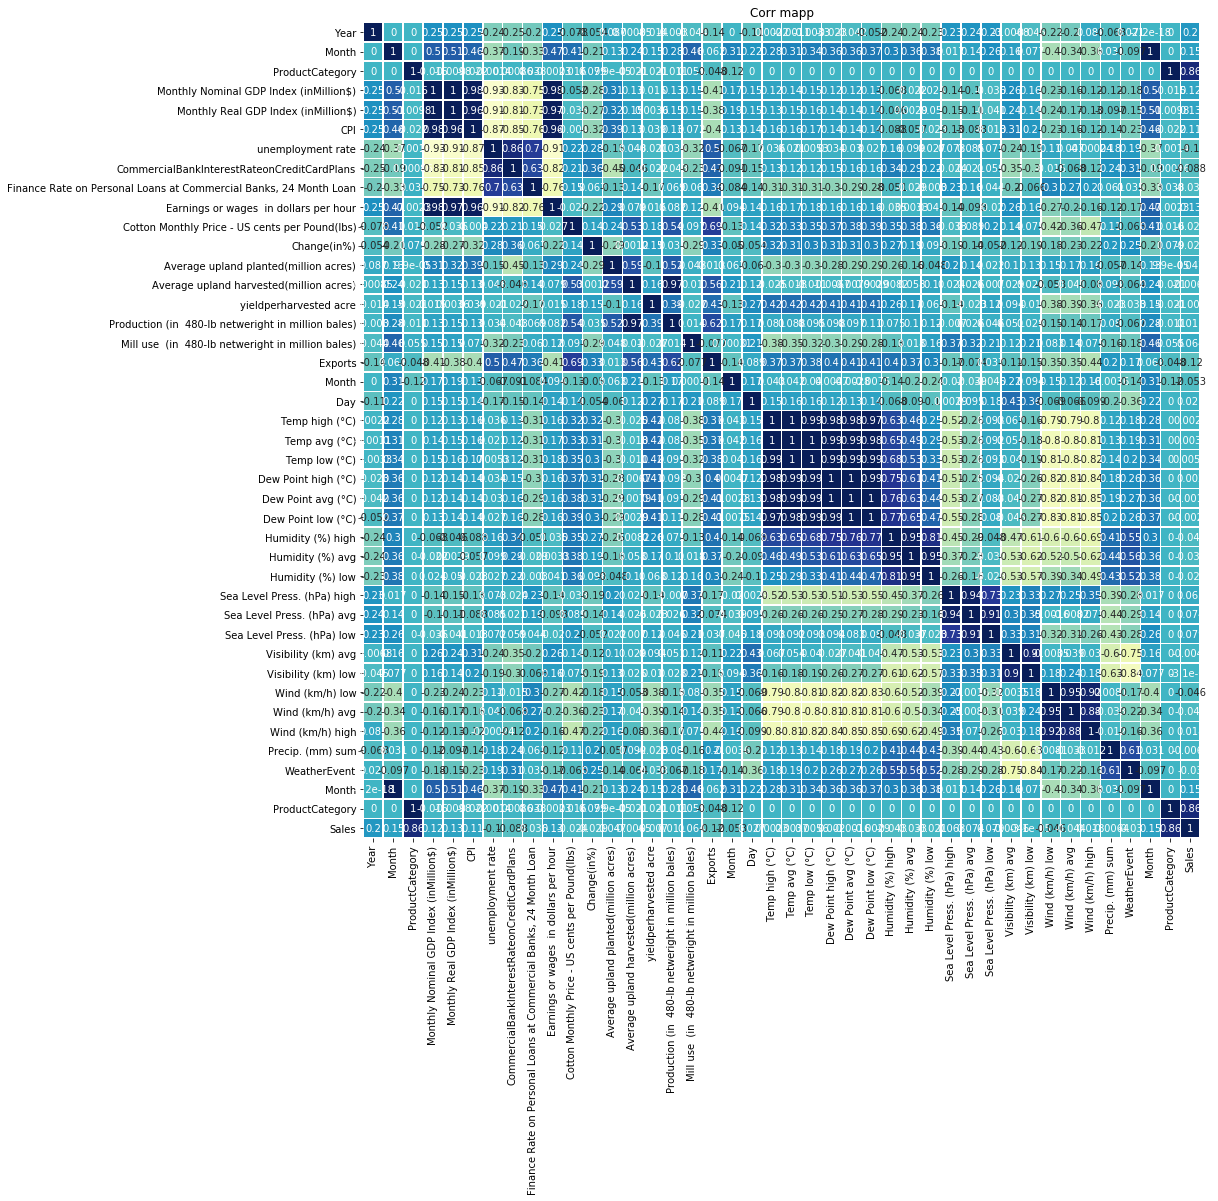

In [148]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.heatmap(train_new.corr(), annot=True, linewidths=.5, center=0, cbar=False, cmap="YlGnBu")
plt.title('Corr mapp')
plt.show()

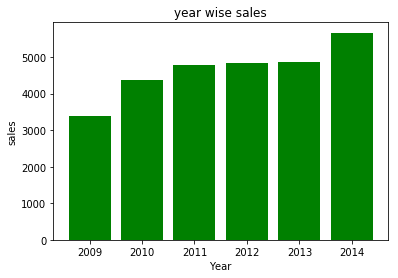

In [149]:
plt.bar(train_new.Year, train_new.Sales,color='g')
#.plot(year, pop_india, color='orange')
plt.ylabel('sales')
plt.xlabel('Year')
plt.title('year wise sales')
plt.show()

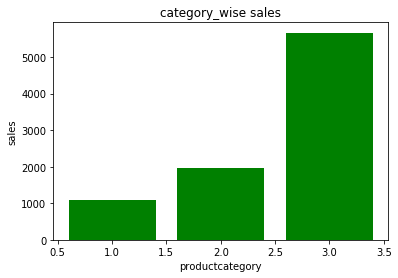

In [154]:
plt.bar(train.ProductCategory , train.Sales,color='g')
#.plot(year, pop_india, color='orange')
plt.ylabel('sales')
plt.xlabel('productcategory')
plt.title('category_wise sales')
plt.show()

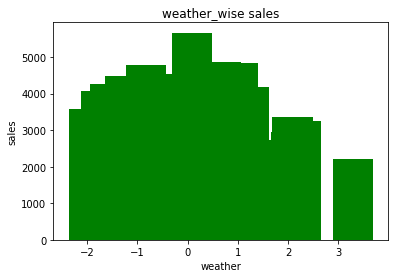

In [165]:
plt.bar(train_new.WeatherEvent, train_new.Sales,color='g')
#.plot(year, pop_india, color='orange')
plt.ylabel('sales')
plt.xlabel('weather')
plt.title('weather_wise sales')
plt.show()

In [ ]:
#'Normal Day':1,'Snow':2,'Rain':3,'Fog , Rain , Snow':4,'Fog , Snow':5,'Rain , Snow':6,'Fog':7,'Fog , Rain':8,'Thunderstorm':9

In [159]:
#train.info()

In [161]:
train_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 43 columns):
Year                                                                 216 non-null int64
Month                                                                216 non-null int64
ProductCategory                                                      216 non-null int64
YearNew                                                              216 non-null object
Monthly Nominal GDP Index (inMillion$)                               216 non-null float64
Monthly Real GDP Index (inMillion$)                                  216 non-null float64
CPI                                                                  216 non-null float64
unemployment rate                                                    216 non-null float64
CommercialBankInterestRateonCreditCardPlans                          216 non-null float64
Finance Rate on Personal Loans at Commercial Banks, 24 Month Loan    216 non-null float64
Ea